# Flight Status Predictor

## Executive Summary

This project is an educational initiative designed to familiarize us with the Machine Learning (ML) Pipeline. While our primary goal is to develop an ML model that predicts significant flight delays, it's important to note that we're focusing on the learning process rather than creating the most robust model possible. The project aims to build a tool that can forecast whether the arrival time of the flight will be delayed by more than 15 minutes. Users input specific details about their flight, and our model provides a straightforward yes or no prediction. This approach allows us to explore and understand each stage of the ML pipeline, from data preparation and feature selection to model training and evaluation.

At the heart of this project is a comprehensive dataset comprising **over 6.7 million flights from April 2023 to March 2024**. This meticulously cleaned and prepared data not only powers our predictive model but also serves as a valuable resource for exploratory data analysis (EDA) and further machine learning applications in the aviation domain.

The project is designed to empower travelers, airlines, and analysts alike. By transforming raw flight data into actionable insights, we're working to enhance travel planning, improve airline operations, and deepen our understanding of air travel patterns. This project bridges the gap between big data and practical applications, ultimately aiming to make air travel more predictable and less stressful for everyone involved.

**What problem are we trying to solve?**

The goal of this project is to **develop and deploy an ML model** in which an end user can specify a set of features describing a commercial flight of interest and receive a categorical (yes or no) output indicating if the arrival time of that flight will be delayed more than fifteen minutes or not. 

**Answer these questions about the data:**

- What variables contribute to a flight being delayed or not?
- Are there any variables that might hinder the analysis?
- Is there imbalance or bias in the dataset that could make the data lean more towards one way than another? 

---

In [73]:
# Import libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
# Store CSV file in variable 
flights = r'..\data\Flight_On_Time_Data.csv'
# Read CSV file in pandas dataframe 
df = pd.read_csv(flights)

In [75]:
# Set options to view all columns instead of truncating columns
pd.set_option('display.max_columns', None)

# Print dataframe to confirm successful loading
df

,Carrier_Name,Year,Quarter,Month,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,Origin_City_State,Destination_Airport_ID,Destination_City_Market_ID,Destination_IATA_Code,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Actual_Dep_Time,Dep_Time_Offset,Dep_Delay_Minutes,Dep_Delay_At_Least_15_Minutes,Scheduled_Arrival_Time,Arr_Time_Block_Group,Actual_Arr_Time,Arr_Time_Offset,Arr_Delay_Minutes,Arr_Delay_At_Least_15_Minutes,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Actual_Gate_to_Gate_Time,Time_Airborne,Number_of_Flights,Distance_Miles,Distance_Group,Carrier_Delay,Weather_Delay,National_Aviation_System_Delay,Security_Delay,Late_Aircraft_Delay
0,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N851UA,1788,11298,30194,DFW,"Dallas/Fort Worth, TX",11618,31703,EWR,"Newark, NJ",Evening,1926,1933,7,7,0,2359,Night,12,13,13,0,0,0,213,219,162,1,1372,6,NaN,NaN,NaN,NaN,NaN
1,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N37530,1787,11292,30325,DEN,"Denver, CO",13871,33316,OMA,"Omaha, NE",Evening,2051,2130,39,39,1,2316,Night,3,47,47,1,0,0,85,93,65,1,472,2,39.0,0.0,8.0,0.0,0.0
2,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N78509,1786,12892,32575,LAX,"Los Angeles, CA",11042,30647,CLE,"Cleveland, OH",Night,2328,2319,-9,0,0,701,Early Morning,650,-11,0,0,0,0,273,271,249,1,2052,9,NaN,NaN,NaN,NaN,NaN
3,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N47280,1785,10721,30721,BOS,"Boston, MA",12264,30852,IAD,"Washington, DC",Early Morning,600,557,-3,0,0,735,Early Morning,724,-11,0,0,0,0,95,87,69,1,413,2,NaN,NaN,NaN,NaN,NaN
4,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N826UA,1784,14747,30559,SEA,"Seattle, WA",11292,30325,DEN,"Denver, CO",Morning,1116,1113,-3,0,0,1459,Early Afternoon,1453,-6,0,0,0,0,163,160,129,1,1024,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777973,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N236JQ,5646,10721,30721,BOS,"Boston, MA",11278,30852,DCA,"Washington, DC",Early Afternoon,1315,1312,-3,0,0,1507,Afternoon,1452,-15,0,0,0,0,112,100,75,1,399,2,NaN,NaN,NaN,NaN,NaN
6777974,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N236JQ,5646,11278,30852,DCA,"Washington, DC",10721,30721,BOS,"Boston, MA",Afternoon,1620,1616,-4,0,0,1802,Evening,1743,-19,0,0,0,0,102,87,67,1,399,2,NaN,NaN,NaN,NaN,NaN
6777975,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N212JQ,5647,10721,30721,BOS,"Boston, MA",11193,33105,CVG,"Cincinnati, OH",Early Afternoon,1425,1418,-7,0,0,1659,Afternoon,1634,-25,0,0,0,0,154,136,110,1,752,4,NaN,NaN,NaN,NaN,NaN
6777976,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N212JQ,5647,11193,33105,CVG,"Cincinnati, OH",10721,30721,BOS,"Boston, MA",Afternoon,1751,1743,-8,0,0,1958,Evening,1951,-7,0,0,0,0,127,128,107,1,752,4,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing (Data Cleaning and Preparation)

I'm tackling the critical task of data preprocessing. My goal is to transform millions of raw flight records into a clean, analysis-ready dataset. I'm carefully cleaning and structuring data from **over 6.7 million** flights, selecting the most relevant features, and ensuring the information is in the best format for our machine learning model. This process not only sets the stage for accurate delay predictions but also creates a valuable resource for broader aviation insights. By focusing on data quality and accessibility, I'm laying the groundwork for both our immediate project goals and future exploratory analyses in the fascinating world of air travel.

<span style="color:red">**NOTE**</span>: This step was mostly taken care of, but wanted to still view the data and make any necessary adjustments

In [78]:
df.columns

Index(['Carrier_Name', 'Year', 'Quarter', 'Month', 'Month_Day', 'Week_Day',
       'Flight_Date', 'Airline_DOT_ID', 'Tail_Number', 'Flight_Number',
       'Origin_Airport_ID', 'Origin_City_Market_ID', 'Origin_IATA_Code',
       'Origin_City_State', 'Destination_Airport_ID',
       'Destination_City_Market_ID', 'Destination_IATA_Code',
       'Destination_City_State', 'Dep_Time_Block_Group',
       'Scheduled_Departure_Time', 'Actual_Dep_Time', 'Dep_Time_Offset',
       'Dep_Delay_Minutes', 'Dep_Delay_At_Least_15_Minutes',
       'Scheduled_Arrival_Time', 'Arr_Time_Block_Group', 'Actual_Arr_Time',
       'Arr_Time_Offset', 'Arr_Delay_Minutes', 'Arr_Delay_At_Least_15_Minutes',
       'Flight_Cancelled', 'Flight_Diverted', 'Scheduled_Gate_to_Gate_Time',
       'Actual_Gate_to_Gate_Time', 'Time_Airborne', 'Number_of_Flights',
       'Distance_Miles', 'Distance_Group', 'Carrier_Delay', 'Weather_Delay',
       'National_Aviation_System_Delay', 'Security_Delay',
       'Late_Aircraft_Delay'],

### Check For Correct Dtypes

Checking for correct data types (dtypes) is crucial in data preprocessing as it ensures data integrity and optimizes performance. Proper dtypes facilitate accurate calculations, enable efficient storage, and allow for seamless functionality with data analysis libraries. Moreover, correct dtypes improve machine learning model accuracy and enable more effective feature engineering, which is essential for our flight delay prediction project.

In [80]:
# Get summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 43 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Carrier_Name                    object 
 1   Year                            int64  
 2   Quarter                         int64  
 3   Month                           object 
 4   Month_Day                       int64  
 5   Week_Day                        object 
 6   Flight_Date                     object 
 7   Airline_DOT_ID                  int64  
 8   Tail_Number                     object 
 9   Flight_Number                   int64  
 10  Origin_Airport_ID               int64  
 11  Origin_City_Market_ID           int64  
 12  Origin_IATA_Code                object 
 13  Origin_City_State               object 
 14  Destination_Airport_ID          int64  
 15  Destination_City_Market_ID      int64  
 16  Destination_IATA_Code           object 
 17  Destination_City_State     

Columns that need to be converted to Object dtype: 
- Year
- Quarter
- Month_Day
- Flight_Number
- Airline_DOT_ID
- Origin_Airport_ID
- Origin_City_Market_ID
- Destination_Airport_ID
- Destination_City_Market_ID
- Scheduled_Departure_Time
- Actual_Dep_Time
- Scheduled_Arrival_Time
- Actual_Arr_Time

However, we will not need some of these columns later down the line, so holding off for now on converting 

### NULL and Duplicate Values

Checking for **null** records is crucial as they can skew analyses and cause errors in our flight delay prediction model, requiring appropriate handling through imputation or removal. Identifying and addressing **duplicate** records prevents data inflation and bias, ensuring each flight is represented accurately without undue influence on our predictions. These checks are fundamental to maintaining data integrity and building a reliable model, especially given our **large dataset of 6.7+ million** flight records.

In [84]:
# Check for missing values 
print(df.isnull().sum())

Carrier_Name                            0
Year                                    0
Quarter                                 0
Month                                   0
Month_Day                               0
Week_Day                                0
Flight_Date                             0
Airline_DOT_ID                          0
Tail_Number                             0
Flight_Number                           0
Origin_Airport_ID                       0
Origin_City_Market_ID                   0
Origin_IATA_Code                        0
Origin_City_State                       0
Destination_Airport_ID                  0
Destination_City_Market_ID              0
Destination_IATA_Code                   0
Destination_City_State                  0
Dep_Time_Block_Group                    0
Scheduled_Departure_Time                0
Actual_Dep_Time                         0
Dep_Time_Offset                         0
Dep_Delay_Minutes                       0
Dep_Delay_At_Least_15_Minutes     

In [85]:
# Check for duplicate entries
df[df.duplicated()]

,Carrier_Name,Year,Quarter,Month,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,Origin_City_State,Destination_Airport_ID,Destination_City_Market_ID,Destination_IATA_Code,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Actual_Dep_Time,Dep_Time_Offset,Dep_Delay_Minutes,Dep_Delay_At_Least_15_Minutes,Scheduled_Arrival_Time,Arr_Time_Block_Group,Actual_Arr_Time,Arr_Time_Offset,Arr_Delay_Minutes,Arr_Delay_At_Least_15_Minutes,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Actual_Gate_to_Gate_Time,Time_Airborne,Number_of_Flights,Distance_Miles,Distance_Group,Carrier_Delay,Weather_Delay,National_Aviation_System_Delay,Security_Delay,Late_Aircraft_Delay


- There doesn't appear to be any duplicate rows
- There are a lot of NULL values in the following columns: Carrier_Delay, Weather_Delay, National_Aviation_System_Delay, Security_Delay, and Late_Aircraft_Delay
- The data cleaning process was mostly done but these columns left NULL values. <span style="color:red">*Why?*</span>

### Remove Columns To Avoid Any Biases and Imbalance

We now want to remove some variables from the dataframe that deals with the actual delay of the flight 
- This will get rid of any biases and imbalance to our data

To build a reliable and fair flight delay prediction model, it's essential to remove columns that could lead to information leakage. This happens when we include data that wouldn't be available at prediction time, like actual arrival times or delay status. By excluding these columns, our model learns from valid predictive features, ensuring it performs accurately in real-world scenarios.

In [89]:
# Will have information leakage from the following columns
df.drop(['Actual_Dep_Time','Dep_Time_Offset','Dep_Delay_Minutes','Actual_Arr_Time','Arr_Time_Offset',
         'Arr_Delay_Minutes', 'Dep_Delay_At_Least_15_Minutes', 'Actual_Gate_to_Gate_Time','Carrier_Delay',
         'Weather_Delay','National_Aviation_System_Delay','Security_Delay','Late_Aircraft_Delay',
         'Actual_Gate_to_Gate_Time','Time_Airborne'], axis=1, inplace=True)

# Already have the date column so no need for this 
df.drop(['Quarter','Year','Month', 'Month_Day'], axis=1, inplace=True)

print("Columns remaining: ", df.shape[1])

Columns remaining:  25


In [90]:
df.rename(columns={'Arr_Delay_At_Least_15_Minutes':'delayed'}, inplace=True)

In [91]:
df.columns

Index(['Carrier_Name', 'Week_Day', 'Flight_Date', 'Airline_DOT_ID',
       'Tail_Number', 'Flight_Number', 'Origin_Airport_ID',
       'Origin_City_Market_ID', 'Origin_IATA_Code', 'Origin_City_State',
       'Destination_Airport_ID', 'Destination_City_Market_ID',
       'Destination_IATA_Code', 'Destination_City_State',
       'Dep_Time_Block_Group', 'Scheduled_Departure_Time',
       'Scheduled_Arrival_Time', 'Arr_Time_Block_Group', 'delayed',
       'Flight_Cancelled', 'Flight_Diverted', 'Scheduled_Gate_to_Gate_Time',
       'Number_of_Flights', 'Distance_Miles', 'Distance_Group'],
      dtype='object')

In [92]:
# View all data again after dropping so many 
df

,Carrier_Name,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,Origin_City_State,Destination_Airport_ID,Destination_City_Market_ID,Destination_IATA_Code,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Scheduled_Arrival_Time,Arr_Time_Block_Group,delayed,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Number_of_Flights,Distance_Miles,Distance_Group
0,United Air Lines Inc.,Wednesday,2023-04-26,19977,N851UA,1788,11298,30194,DFW,"Dallas/Fort Worth, TX",11618,31703,EWR,"Newark, NJ",Evening,1926,2359,Night,0,0,0,213,1,1372,6
1,United Air Lines Inc.,Wednesday,2023-04-26,19977,N37530,1787,11292,30325,DEN,"Denver, CO",13871,33316,OMA,"Omaha, NE",Evening,2051,2316,Night,1,0,0,85,1,472,2
2,United Air Lines Inc.,Wednesday,2023-04-26,19977,N78509,1786,12892,32575,LAX,"Los Angeles, CA",11042,30647,CLE,"Cleveland, OH",Night,2328,701,Early Morning,0,0,0,273,1,2052,9
3,United Air Lines Inc.,Wednesday,2023-04-26,19977,N47280,1785,10721,30721,BOS,"Boston, MA",12264,30852,IAD,"Washington, DC",Early Morning,600,735,Early Morning,0,0,0,95,1,413,2
4,United Air Lines Inc.,Wednesday,2023-04-26,19977,N826UA,1784,14747,30559,SEA,"Seattle, WA",11292,30325,DEN,"Denver, CO",Morning,1116,1459,Early Afternoon,0,0,0,163,1,1024,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777973,Republic Airline,Friday,2024-03-29,20452,N236JQ,5646,10721,30721,BOS,"Boston, MA",11278,30852,DCA,"Washington, DC",Early Afternoon,1315,1507,Afternoon,0,0,0,112,1,399,2
6777974,Republic Airline,Friday,2024-03-29,20452,N236JQ,5646,11278,30852,DCA,"Washington, DC",10721,30721,BOS,"Boston, MA",Afternoon,1620,1802,Evening,0,0,0,102,1,399,2
6777975,Republic Airline,Friday,2024-03-29,20452,N212JQ,5647,10721,30721,BOS,"Boston, MA",11193,33105,CVG,"Cincinnati, OH",Early Afternoon,1425,1659,Afternoon,0,0,0,154,1,752,4
6777976,Republic Airline,Friday,2024-03-29,20452,N212JQ,5647,11193,33105,CVG,"Cincinnati, OH",10721,30721,BOS,"Boston, MA",Afternoon,1751,1958,Evening,0,0,0,127,1,752,4


---

# Exploratory Data Analysis (EDA)

I performed EDA as it reveals the dataset’s patterns and anomalies. By identifying trends, spotting outliers, and assessing data quality, we ensure accuracy and relevance. This process helps me select the best features and refine our hypotheses, resulting in a reliable flight delay prediction model.

In [95]:
# Check summary statistics
df['Distance_Miles'].describe()

count    6.777978e+06
mean     8.350128e+02
std      5.979042e+02
min      2.100000e+01
25%      3.990000e+02
50%      6.800000e+02
75%      1.069000e+03
max      5.095000e+03
Name: Distance_Miles, dtype: float64

### How many flights were delayed? 

Understanding how many flights were delayed gives us insight into the airline or airport's performance and reliability. It helps us identify trends and patterns, guiding our strategies for improving punctuality. Additionally, this information is vital for assessing the impact on passengers and operations, leading to better decision-making and resource allocation.

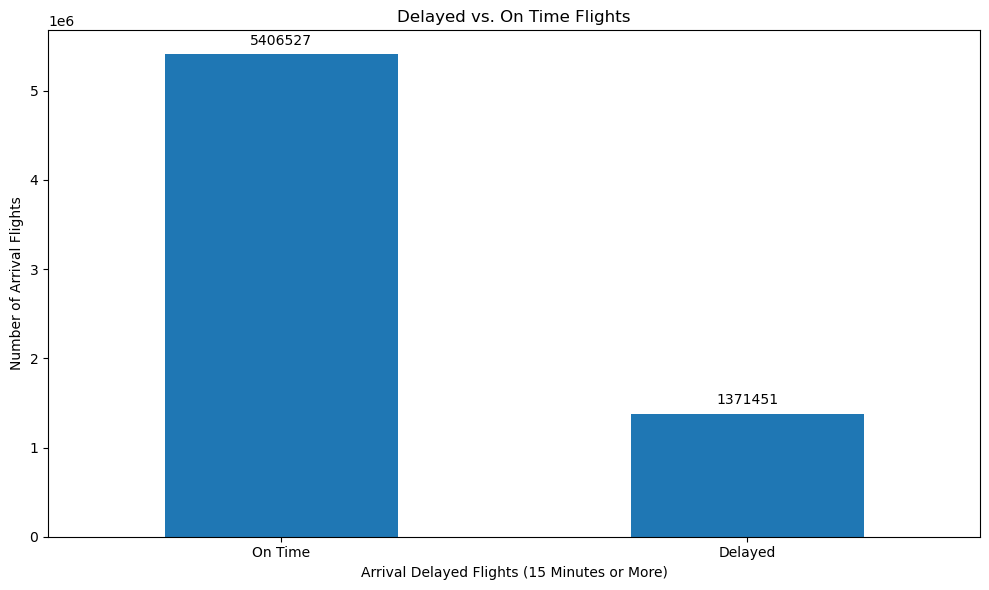

delayed
0    79.766075
1    20.233925
Name: count, dtype: float64


In [97]:
# Count the occurrences of flight delays
delayed_counts = df['delayed'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
ax = delayed_counts.plot(kind='bar')

# Add text annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    
plt.xlabel('Arrival Delayed Flights (15 Minutes or More)')
plt.ylabel('Number of Arrival Flights')
plt.title('Delayed vs. On Time Flights')
plt.xticks(ticks=[0, 1], rotation=0, labels=['On Time', 'Delayed'], ha='center')  # Rotate x-axis labels for better visibility and define labels 
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

print((df['delayed'].value_counts()/df.shape[0]) * 100)

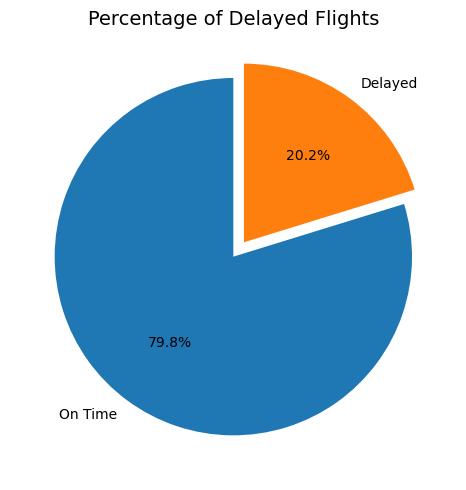

In [98]:
# Visualizing Delayed Flight Percentage

# Extract total number of on time and delayed flights
on_time, delayed = df['delayed'].value_counts()

# Data and Labels
data = [on_time, delayed]
keys = ['On Time', 'Delayed']

# Pie Chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    data,
    labels=keys,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0, 0.1]
)


# Adjusting Figure Size
fig.set_size_inches(5, 5)

# Title and Layout Adjustments
plt.title('Percentage of Delayed Flights', fontsize=14)
plt.tight_layout()

# Display the plot
plt.show()

**About <span style="color:red">20%</span> of flights were delayed**

### What kind of distribution do we have for airlines? 

Knowing the distribution for airlines helps us understand how flight delays vary across different carriers. This information can reveal which airlines are more punctual and which may need to improve their on-time performance. Additionally, it allows us to make data-driven comparisons and identify patterns that can inform strategic decisions and enhance overall efficiency.

- Does it matter which airline you choose that causes the delayed flights? 

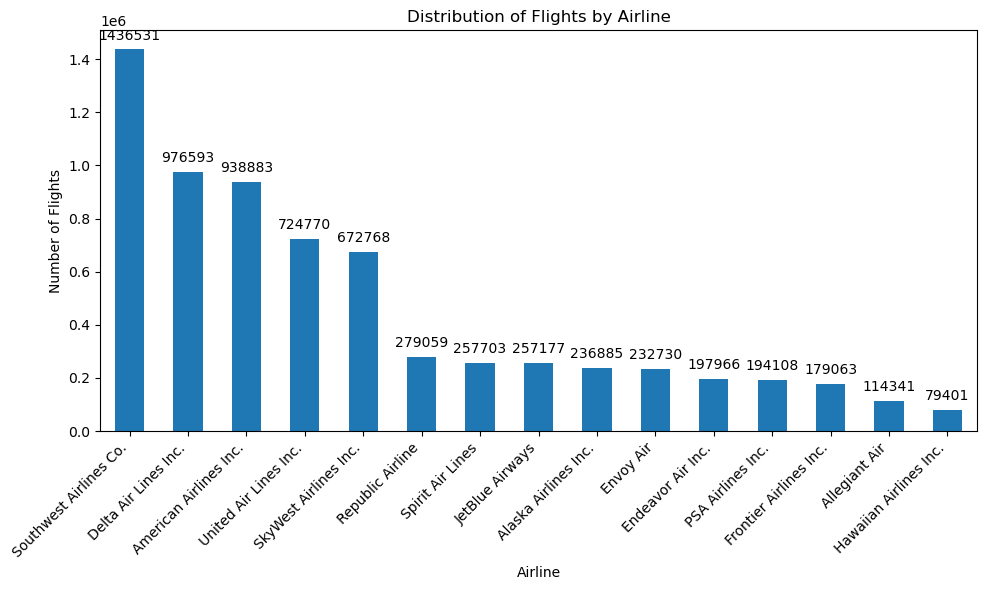

In [101]:
# Count the occurrences of each airline
airline_counts = df['Carrier_Name'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
ax = airline_counts.plot(kind='bar')

# Add text annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flights by Airline')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

As seen in the bar chart, the top 5 airlines with the most flights are as follows: 
- **Southwest Airlines Co.**
- **Delta Air Lines Inc.**
- **American Airlines Inc.**
- **United Air Lines Inc.**
- **SkyWest Airlines Inc.**

<Figure size 1000x600 with 0 Axes>

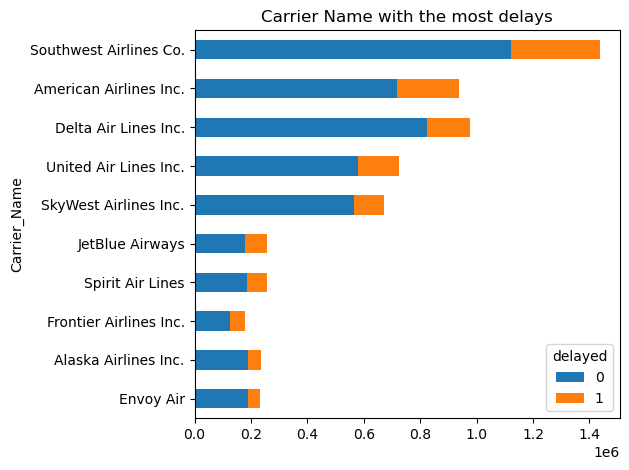

In [103]:
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
df.groupby(['Carrier_Name', 'delayed']).size().unstack().sort_values(by=1, ascending=False).head(10).plot(kind='barh', stacked=True)
plt.title('Carrier Name with the most delays')
plt.gca().invert_yaxis()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [104]:
# Besides the chart, will add the actual values to check if bar chart outputting correctly 
df.groupby(['Carrier_Name', 'delayed']).size().unstack().sort_values(by=1, ascending=False).head(10)

delayed,0,1
Carrier_Name,,
Southwest Airlines Co.,1120851,315680
American Airlines Inc.,719424,219459
Delta Air Lines Inc.,825230,151363
United Air Lines Inc.,581184,143586
SkyWest Airlines Inc.,565210,107558
JetBlue Airways,177202,79975
Spirit Air Lines,184906,72797
Frontier Airlines Inc.,125646,53417
Alaska Airlines Inc.,190537,46348


The following airlines have the most delayed flights out of the top 10 carriers: 
- **Southwest Airlines Co.**
- **American Airlines Inc.**
- **Delta Air Lines Inc.**
- **United Air Lines Inc.**
- **SkyWest Airlines Inc.**

This aligns with what we found previously since these carriers had the most flights out of all of them. 

We will still investigate the top 10 carriers with the most delays, but keep in mind these top 5 carriers for now

### Does location matter when it comes to flight delays?

Knowing if location impacts flight delays helps us pinpoint airports or regions with higher delay rates. This understanding can uncover specific challenges or factors contributing to these delays. Additionally, it allows us to develop targeted strategies and allocate resources more effectively to improve punctuality in those areas.

Let us see which locations are responsible for the most delays in the above carriers

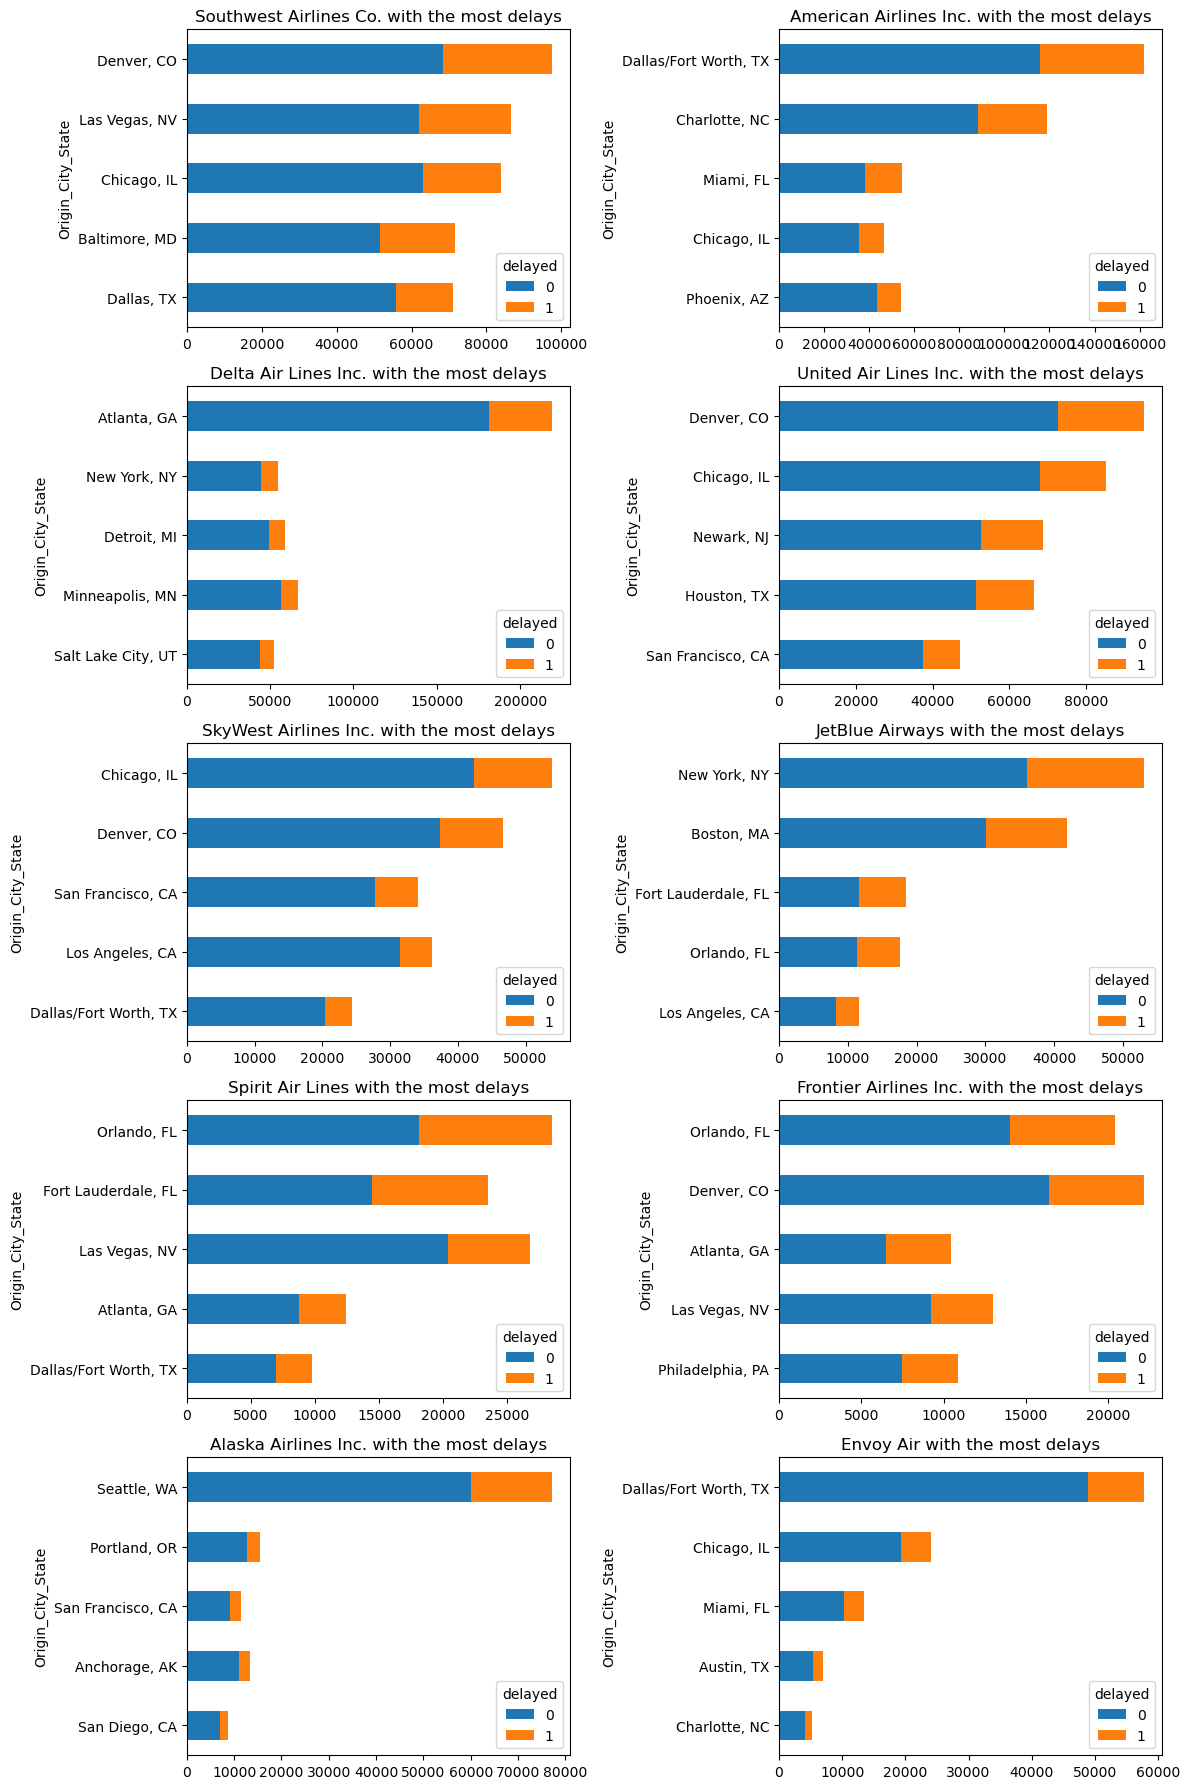

In [109]:
carrier_name = ['Southwest Airlines Co.', 'American Airlines Inc.', 'Delta Air Lines Inc.', 'United Air Lines Inc.',
                'SkyWest Airlines Inc.', 'JetBlue Airways', 'Spirit Air Lines', 'Frontier Airlines Inc.', 
                'Alaska Airlines Inc.', 'Envoy Air']

fig, axes = plt.subplots(nrows=int((len(carrier_name) - 1) / 2) + 1, ncols=2, figsize=(12, 18))

# Flatten axes in case there's only one row
axes = axes.ravel()

for i, carrier in enumerate(carrier_name):
    try:
        # Try to plot on current subplot
        df[df['Carrier_Name'] == carrier].groupby(['Origin_City_State', 'delayed']).size().unstack().sort_values(by=1, ascending=False).head(5).plot(kind='barh', stacked=True, ax=axes[i])
        axes[i].set_title(f'{carrier} with the most delays')
        axes[i].invert_yaxis()
    except IndexError:
        # If all subplots are used, break the loop
        break

# Make sure any unused axes don't have titles or labels
#for ax in axes[i:]:
#    ax.axis('off')

plt.tight_layout()
plt.show()

**Key findings**: 
- These carriers have one thing in common: the most flight delays happen in major cities
- This might be obvious, but it was an interesting insight that I found to impact flight delays

Now that we know the locations that have the most delays in the top 10 carriers, let us look at the top 5 carriers we previously observed to have the most influence on delayed flights

### Which year and month had the most delayed flights? 

Knowing which year and month had the most delayed flights helps in spotting seasonal trends and patterns. This insight can highlight peak times when delays are more common, allowing us to proactively address issues during these periods. Additionally, it aids in assessing past interventions and planning future strategies to improve on-time performance.

In [113]:
# View the dataframe again
df

,Carrier_Name,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,Origin_City_State,Destination_Airport_ID,Destination_City_Market_ID,Destination_IATA_Code,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Scheduled_Arrival_Time,Arr_Time_Block_Group,delayed,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Number_of_Flights,Distance_Miles,Distance_Group
0,United Air Lines Inc.,Wednesday,2023-04-26,19977,N851UA,1788,11298,30194,DFW,"Dallas/Fort Worth, TX",11618,31703,EWR,"Newark, NJ",Evening,1926,2359,Night,0,0,0,213,1,1372,6
1,United Air Lines Inc.,Wednesday,2023-04-26,19977,N37530,1787,11292,30325,DEN,"Denver, CO",13871,33316,OMA,"Omaha, NE",Evening,2051,2316,Night,1,0,0,85,1,472,2
2,United Air Lines Inc.,Wednesday,2023-04-26,19977,N78509,1786,12892,32575,LAX,"Los Angeles, CA",11042,30647,CLE,"Cleveland, OH",Night,2328,701,Early Morning,0,0,0,273,1,2052,9
3,United Air Lines Inc.,Wednesday,2023-04-26,19977,N47280,1785,10721,30721,BOS,"Boston, MA",12264,30852,IAD,"Washington, DC",Early Morning,600,735,Early Morning,0,0,0,95,1,413,2
4,United Air Lines Inc.,Wednesday,2023-04-26,19977,N826UA,1784,14747,30559,SEA,"Seattle, WA",11292,30325,DEN,"Denver, CO",Morning,1116,1459,Early Afternoon,0,0,0,163,1,1024,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777973,Republic Airline,Friday,2024-03-29,20452,N236JQ,5646,10721,30721,BOS,"Boston, MA",11278,30852,DCA,"Washington, DC",Early Afternoon,1315,1507,Afternoon,0,0,0,112,1,399,2
6777974,Republic Airline,Friday,2024-03-29,20452,N236JQ,5646,11278,30852,DCA,"Washington, DC",10721,30721,BOS,"Boston, MA",Afternoon,1620,1802,Evening,0,0,0,102,1,399,2
6777975,Republic Airline,Friday,2024-03-29,20452,N212JQ,5647,10721,30721,BOS,"Boston, MA",11193,33105,CVG,"Cincinnati, OH",Early Afternoon,1425,1659,Afternoon,0,0,0,154,1,752,4
6777976,Republic Airline,Friday,2024-03-29,20452,N212JQ,5647,11193,33105,CVG,"Cincinnati, OH",10721,30721,BOS,"Boston, MA",Afternoon,1751,1958,Evening,0,0,0,127,1,752,4


In [114]:
# Convert 'Flight_Date' to datetime objects
df['Flight_Date'] = pd.to_datetime(df['Flight_Date'])

# Extract month and year
df['Month'] = df['Flight_Date'].dt.month
df['Year'] = df['Flight_Date'].dt.year

# Aggregate delayed flights by month and year
southwest_delayed = df[df['Carrier_Name'] == 'Southwest Airlines Co.'].groupby(['Carrier_Name', 'Year', 'Month'])['delayed'].value_counts().reset_index(name='Number of Delayed Flights')
american_delayed = df[df['Carrier_Name'] == 'American Airlines Inc.'].groupby(['Carrier_Name', 'Year', 'Month'])['delayed'].value_counts().reset_index(name='Number of Delayed Flights')
delta_delayed = df[df['Carrier_Name'] == 'Delta Air Lines Inc.'].groupby(['Carrier_Name', 'Year', 'Month'])['delayed'].value_counts().reset_index(name='Number of Delayed Flights')
united_delayed = df[df['Carrier_Name'] == 'United Air Lines Inc.'].groupby(['Carrier_Name', 'Year', 'Month'])['delayed'].value_counts().reset_index(name='Number of Delayed Flights')
skywest_delayed = df[df['Carrier_Name'] == 'SkyWest Airlines Inc.'].groupby(['Carrier_Name', 'Year', 'Month'])['delayed'].value_counts().reset_index(name='Number of Delayed Flights')

In [115]:
# View one of the dataframes to see how it is structured
southwest_delayed

,Carrier_Name,Year,Month,delayed,Number of Delayed Flights
0,Southwest Airlines Co.,2023,4,0,85135
1,Southwest Airlines Co.,2023,4,1,29278
2,Southwest Airlines Co.,2023,5,0,96588
3,Southwest Airlines Co.,2023,5,1,25058
4,Southwest Airlines Co.,2023,6,0,83017
5,Southwest Airlines Co.,2023,6,1,35058
6,Southwest Airlines Co.,2023,7,0,85790
7,Southwest Airlines Co.,2023,7,1,39050
8,Southwest Airlines Co.,2023,8,0,94936
9,Southwest Airlines Co.,2023,8,1,28374


In [116]:
carriers_df= [southwest_delayed, american_delayed, delta_delayed, united_delayed, skywest_delayed]

# Create another column that combines just the year and month (i.e., Year-Month)
for i, carrier in enumerate(carriers_df): 
    carrier['Year_Month'] = carrier.Year.astype(str) + carrier.Month.astype(str)
    carrier['Year_Month'] = pd.to_datetime(carrier['Year_Month'], format="%Y%m").dt.strftime("%Y-%m")

In [117]:
# Filter dataframe so that only delayed == 1 (this means a delayed flight) 
southwest_delayed = southwest_delayed[southwest_delayed['delayed'] == 1]
american_delayed = american_delayed[american_delayed['delayed'] == 1]
delta_delayed = delta_delayed[delta_delayed['delayed'] == 1]
united_delayed = united_delayed[united_delayed['delayed'] == 1]
skywest_delayed = skywest_delayed[skywest_delayed['delayed'] == 1]

In [118]:
# Check each dataframe to ensure new column is there
southwest_delayed

,Carrier_Name,Year,Month,delayed,Number of Delayed Flights,Year_Month
1,Southwest Airlines Co.,2023,4,1,29278,2023-04
3,Southwest Airlines Co.,2023,5,1,25058,2023-05
5,Southwest Airlines Co.,2023,6,1,35058,2023-06
7,Southwest Airlines Co.,2023,7,1,39050,2023-07
9,Southwest Airlines Co.,2023,8,1,28374,2023-08
11,Southwest Airlines Co.,2023,9,1,23230,2023-09
13,Southwest Airlines Co.,2023,10,1,25296,2023-10
15,Southwest Airlines Co.,2023,11,1,17007,2023-11
17,Southwest Airlines Co.,2023,12,1,21839,2023-12
19,Southwest Airlines Co.,2024,1,1,26310,2024-01


In [119]:
american_delayed

,Carrier_Name,Year,Month,delayed,Number of Delayed Flights,Year_Month
1,American Airlines Inc.,2023,4,1,19385,2023-04
3,American Airlines Inc.,2023,5,1,16502,2023-05
5,American Airlines Inc.,2023,6,1,24149,2023-06
7,American Airlines Inc.,2023,7,1,25955,2023-07
9,American Airlines Inc.,2023,8,1,21278,2023-08
11,American Airlines Inc.,2023,9,1,15570,2023-09
13,American Airlines Inc.,2023,10,1,13521,2023-10
15,American Airlines Inc.,2023,11,1,11533,2023-11
17,American Airlines Inc.,2023,12,1,13332,2023-12
19,American Airlines Inc.,2024,1,1,22292,2024-01


In [120]:
delta_delayed

,Carrier_Name,Year,Month,delayed,Number of Delayed Flights,Year_Month
1,Delta Air Lines Inc.,2023,4,1,14248,2023-04
3,Delta Air Lines Inc.,2023,5,1,10692,2023-05
5,Delta Air Lines Inc.,2023,6,1,19643,2023-06
7,Delta Air Lines Inc.,2023,7,1,20990,2023-07
9,Delta Air Lines Inc.,2023,8,1,16444,2023-08
11,Delta Air Lines Inc.,2023,9,1,11195,2023-09
13,Delta Air Lines Inc.,2023,10,1,7950,2023-10
15,Delta Air Lines Inc.,2023,11,1,6937,2023-11
17,Delta Air Lines Inc.,2023,12,1,7827,2023-12
19,Delta Air Lines Inc.,2024,1,1,13930,2024-01


In [121]:
united_delayed

,Carrier_Name,Year,Month,delayed,Number of Delayed Flights,Year_Month
1,United Air Lines Inc.,2023,4,1,13078,2023-04
3,United Air Lines Inc.,2023,5,1,12989,2023-05
5,United Air Lines Inc.,2023,6,1,18190,2023-06
7,United Air Lines Inc.,2023,7,1,20057,2023-07
9,United Air Lines Inc.,2023,8,1,12899,2023-08
11,United Air Lines Inc.,2023,9,1,10779,2023-09
13,United Air Lines Inc.,2023,10,1,8384,2023-10
15,United Air Lines Inc.,2023,11,1,6357,2023-11
17,United Air Lines Inc.,2023,12,1,8038,2023-12
19,United Air Lines Inc.,2024,1,1,11659,2024-01


In [122]:
skywest_delayed

,Carrier_Name,Year,Month,delayed,Number of Delayed Flights,Year_Month
1,SkyWest Airlines Inc.,2023,4,1,7781,2023-04
3,SkyWest Airlines Inc.,2023,5,1,7260,2023-05
5,SkyWest Airlines Inc.,2023,6,1,9280,2023-06
7,SkyWest Airlines Inc.,2023,7,1,9776,2023-07
9,SkyWest Airlines Inc.,2023,8,1,9041,2023-08
11,SkyWest Airlines Inc.,2023,9,1,9227,2023-09
13,SkyWest Airlines Inc.,2023,10,1,8481,2023-10
15,SkyWest Airlines Inc.,2023,11,1,7565,2023-11
17,SkyWest Airlines Inc.,2023,12,1,8160,2023-12
19,SkyWest Airlines Inc.,2024,1,1,13082,2024-01


In [123]:
top5_carriers = pd.concat([southwest_delayed, american_delayed, delta_delayed, united_delayed, skywest_delayed])
top5_carriers = top5_carriers.reset_index()
top5_carriers

,index,Carrier_Name,Year,Month,delayed,Number of Delayed Flights,Year_Month
0,1,Southwest Airlines Co.,2023,4,1,29278,2023-04
1,3,Southwest Airlines Co.,2023,5,1,25058,2023-05
2,5,Southwest Airlines Co.,2023,6,1,35058,2023-06
3,7,Southwest Airlines Co.,2023,7,1,39050,2023-07
4,9,Southwest Airlines Co.,2023,8,1,28374,2023-08
5,11,Southwest Airlines Co.,2023,9,1,23230,2023-09
6,13,Southwest Airlines Co.,2023,10,1,25296,2023-10
7,15,Southwest Airlines Co.,2023,11,1,17007,2023-11
8,17,Southwest Airlines Co.,2023,12,1,21839,2023-12
9,19,Southwest Airlines Co.,2024,1,1,26310,2024-01


In [124]:
# Drop unnecessary columns from new dataframe 
top5_carriers.drop(['index', 'Year', 'Month', 'delayed'], axis=1, inplace=True)

In [125]:
# Validate columns were dropped
top5_carriers

,Carrier_Name,Number of Delayed Flights,Year_Month
0,Southwest Airlines Co.,29278,2023-04
1,Southwest Airlines Co.,25058,2023-05
2,Southwest Airlines Co.,35058,2023-06
3,Southwest Airlines Co.,39050,2023-07
4,Southwest Airlines Co.,28374,2023-08
5,Southwest Airlines Co.,23230,2023-09
6,Southwest Airlines Co.,25296,2023-10
7,Southwest Airlines Co.,17007,2023-11
8,Southwest Airlines Co.,21839,2023-12
9,Southwest Airlines Co.,26310,2024-01


C:\Users\ohins\anaconda3\envs\Python3_12_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ohins\anaconda3\envs\Python3_12_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


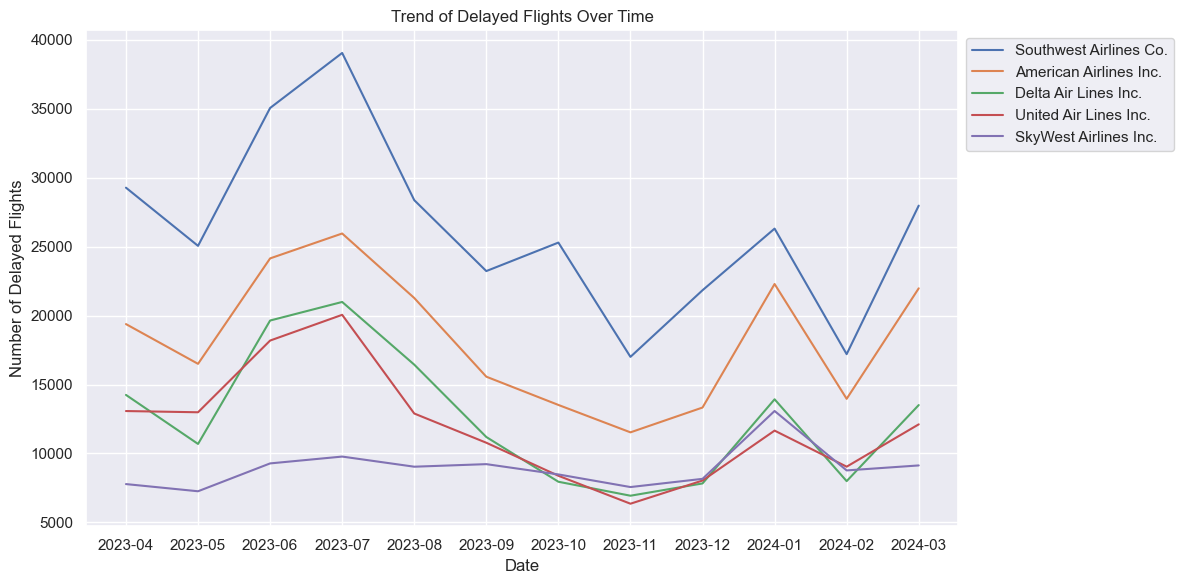

In [126]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
# Plot the responses for different events and regions
delayed_flights = sns.lineplot(data=top5_carriers, x='Year_Month', y='Number of Delayed Flights',
                               hue='Carrier_Name')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Delayed Flights')
plt.title('Trend of Delayed Flights Over Time')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

plt.tight_layout()
# Display the chart
plt.show()

This Timeseries analysis uncovers a few things: 
- Southwest Airlines Co. has the highest in delayed flights out of all of the top 5 carriers
- The biggest delays happened in July 2023 for Southwest Airlines and there seems to be a trend for the other airlines as well. All of the airlines had the biggest delays in July 2023 except Skywest Airlines, which had its biggest delay in January 2024.
- I found this to be interesting because July means summer. Summer means lots of vacation, especially with school being out
- It was strange to see SkyWest Airlines had the lowest flight delays out of all of the airlines, but my assumption is that it is not a well-known airline or not as popular of one to use in the summer months 
- All the carriers had their second biggest delay in January 2024. This delay could be the result of people coming back from the holidays, such as New Years. It could also mean that people are coming back from vacation over winter break or something along those lines 
- Southwest Airlines did peak in October 2023 while all the other airlines continued to decrease in flight delays. At first, I was thinking this could be an anomaly but upon closer inspection, I concluded that it is around Halloween and the Fall season. This could mean people vacation during this time and choose Southwest Airlines during Fall.

# Export DataFrame with removed columns to CSV 

This will make it easier for future analysis with the columns already removed. 

**This file will be used for Feature Selection**

In [129]:
df.info()
print("Columns remaining: ", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 27 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Carrier_Name                 object        
 1   Week_Day                     object        
 2   Flight_Date                  datetime64[ns]
 3   Airline_DOT_ID               int64         
 4   Tail_Number                  object        
 5   Flight_Number                int64         
 6   Origin_Airport_ID            int64         
 7   Origin_City_Market_ID        int64         
 8   Origin_IATA_Code             object        
 9   Origin_City_State            object        
 10  Destination_Airport_ID       int64         
 11  Destination_City_Market_ID   int64         
 12  Destination_IATA_Code        object        
 13  Destination_City_State       object        
 14  Dep_Time_Block_Group         object        
 15  Scheduled_Departure_Time     int64         
 16  

In [130]:
df.drop(['Year','Month'], axis=1, inplace=True)

In [131]:
df.info()
print("Columns remaining: ", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 25 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Carrier_Name                 object        
 1   Week_Day                     object        
 2   Flight_Date                  datetime64[ns]
 3   Airline_DOT_ID               int64         
 4   Tail_Number                  object        
 5   Flight_Number                int64         
 6   Origin_Airport_ID            int64         
 7   Origin_City_Market_ID        int64         
 8   Origin_IATA_Code             object        
 9   Origin_City_State            object        
 10  Destination_Airport_ID       int64         
 11  Destination_City_Market_ID   int64         
 12  Destination_IATA_Code        object        
 13  Destination_City_State       object        
 14  Dep_Time_Block_Group         object        
 15  Scheduled_Departure_Time     int64         
 16  

In [132]:
df.columns

Index(['Carrier_Name', 'Week_Day', 'Flight_Date', 'Airline_DOT_ID',
       'Tail_Number', 'Flight_Number', 'Origin_Airport_ID',
       'Origin_City_Market_ID', 'Origin_IATA_Code', 'Origin_City_State',
       'Destination_Airport_ID', 'Destination_City_Market_ID',
       'Destination_IATA_Code', 'Destination_City_State',
       'Dep_Time_Block_Group', 'Scheduled_Departure_Time',
       'Scheduled_Arrival_Time', 'Arr_Time_Block_Group', 'delayed',
       'Flight_Cancelled', 'Flight_Diverted', 'Scheduled_Gate_to_Gate_Time',
       'Number_of_Flights', 'Distance_Miles', 'Distance_Group'],
      dtype='object')

In [133]:
# Grouping numerical columns and
# Moving the target variable to be the right-most column

# Columns to move
cols_to_move = [
                'Carrier_Name',
                'Week_Day',
                'Flight_Date', 
                'Airline_DOT_ID',
                'Tail_Number', 
                'Flight_Number', 
                'Origin_Airport_ID', 
                'Origin_City_Market_ID',
                'Origin_IATA_Code',
                'Origin_City_State',
                'Destination_Airport_ID', 
                'Destination_City_Market_ID',
                'Destination_IATA_Code',
                'Destination_City_State',
                'Dep_Time_Block_Group',
                'Scheduled_Departure_Time',
                'Scheduled_Arrival_Time',
                'Arr_Time_Block_Group',
                'Flight_Cancelled', 
                'Flight_Diverted', 
                'Scheduled_Gate_to_Gate_Time', 
                'Number_of_Flights', 
                'Distance_Miles', 
                'Distance_Group'
                ]
       
last_col = 'delayed'

# Extracting the columns to move
columns_to_move = df[cols_to_move]

# Dropping these columns from the DataFrame
df.drop(columns=cols_to_move, inplace=True)

# Extracting the last column
last_column = df.pop(last_col)

# Reinserting the numerical columns
df = pd.concat([df, columns_to_move], axis=1)

# Reinserting the last column
df[last_col] = last_column

In [134]:
df.info()
print("Columns remaining: ", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 25 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Carrier_Name                 object        
 1   Week_Day                     object        
 2   Flight_Date                  datetime64[ns]
 3   Airline_DOT_ID               int64         
 4   Tail_Number                  object        
 5   Flight_Number                int64         
 6   Origin_Airport_ID            int64         
 7   Origin_City_Market_ID        int64         
 8   Origin_IATA_Code             object        
 9   Origin_City_State            object        
 10  Destination_Airport_ID       int64         
 11  Destination_City_Market_ID   int64         
 12  Destination_IATA_Code        object        
 13  Destination_City_State       object        
 14  Dep_Time_Block_Group         object        
 15  Scheduled_Departure_Time     int64         
 16  

In [135]:
# Print new dataframe to ensure everything is fine after moving columns around
df

,Carrier_Name,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,Origin_City_State,Destination_Airport_ID,Destination_City_Market_ID,Destination_IATA_Code,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Scheduled_Arrival_Time,Arr_Time_Block_Group,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Number_of_Flights,Distance_Miles,Distance_Group,delayed
0,United Air Lines Inc.,Wednesday,2023-04-26,19977,N851UA,1788,11298,30194,DFW,"Dallas/Fort Worth, TX",11618,31703,EWR,"Newark, NJ",Evening,1926,2359,Night,0,0,213,1,1372,6,0
1,United Air Lines Inc.,Wednesday,2023-04-26,19977,N37530,1787,11292,30325,DEN,"Denver, CO",13871,33316,OMA,"Omaha, NE",Evening,2051,2316,Night,0,0,85,1,472,2,1
2,United Air Lines Inc.,Wednesday,2023-04-26,19977,N78509,1786,12892,32575,LAX,"Los Angeles, CA",11042,30647,CLE,"Cleveland, OH",Night,2328,701,Early Morning,0,0,273,1,2052,9,0
3,United Air Lines Inc.,Wednesday,2023-04-26,19977,N47280,1785,10721,30721,BOS,"Boston, MA",12264,30852,IAD,"Washington, DC",Early Morning,600,735,Early Morning,0,0,95,1,413,2,0
4,United Air Lines Inc.,Wednesday,2023-04-26,19977,N826UA,1784,14747,30559,SEA,"Seattle, WA",11292,30325,DEN,"Denver, CO",Morning,1116,1459,Early Afternoon,0,0,163,1,1024,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777973,Republic Airline,Friday,2024-03-29,20452,N236JQ,5646,10721,30721,BOS,"Boston, MA",11278,30852,DCA,"Washington, DC",Early Afternoon,1315,1507,Afternoon,0,0,112,1,399,2,0
6777974,Republic Airline,Friday,2024-03-29,20452,N236JQ,5646,11278,30852,DCA,"Washington, DC",10721,30721,BOS,"Boston, MA",Afternoon,1620,1802,Evening,0,0,102,1,399,2,0
6777975,Republic Airline,Friday,2024-03-29,20452,N212JQ,5647,10721,30721,BOS,"Boston, MA",11193,33105,CVG,"Cincinnati, OH",Early Afternoon,1425,1659,Afternoon,0,0,154,1,752,4,0
6777976,Republic Airline,Friday,2024-03-29,20452,N212JQ,5647,11193,33105,CVG,"Cincinnati, OH",10721,30721,BOS,"Boston, MA",Afternoon,1751,1958,Evening,0,0,127,1,752,4,0


In [136]:
# Export new dataframe to CSV file
df.to_csv(r'..\data\DF_from_EDA_for_Feature_Selection.csv', index=False)